In [1]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [2]:
train = pd.read_csv('https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/train.csv')

train_original=train.copy()

In [8]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
test = pd.read_csv('https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/test.csv')

test_original=test.copy()
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


### Pre processing

In [9]:
combine = train.append(test,ignore_index=True,sort=True)

In [11]:
combine

,id,label,tweet
0,1,0.0,@user when a father is dysfunctional and is s...
1,2,0.0,@user @user thanks for #lyft credit i can't us...
2,3,0.0,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...
6,7,0.0,@user camping tomorrow @user @user @user @use...
7,8,0.0,the next school year is the year for exams.ð...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...


In [12]:
def remove_pattern(text,pattern):
    
    # re.findall() finds the pattern i.e @user and puts it in a list for further task
    r = re.findall(pattern,text)
    
    # re.sub() removes @user from the sentences in the dataset
    for i in r:
        text = re.sub(i,"",text)
    
    return text

In [14]:
combine['Tidy_Tweets'] = np.vectorize(remove_pattern)(combine['tweet'], "@[\w]*") #Calls remove_pattern to remove @user
combine['Tidy_Tweets'] = combine['Tidy_Tweets'].str.replace("[^a-zA-Z#]", " ") #Removes all special characters
combine.head()

,id,label,tweet,Tidy_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation


In [15]:
combine['Tidy_Tweets'] = combine['Tidy_Tweets'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3])) #Remove stop words and short words like Oh and hmm
combine.head()


,id,label,tweet,Tidy_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


In [16]:
#Tokenization
tokenized_tweet = combine['Tidy_Tweets'].apply(lambda x: x.split())

tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: Tidy_Tweets, dtype: object

In [17]:
# Now we will use lemmitization to get the words in root form
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [lemmatizer.lemmatize(i) for i in x])
tokenized_tweet.head()


0    [when, father, dysfunctional, selfish, drag, k...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: Tidy_Tweets, dtype: object

In [18]:
#Get the tokens back in combine
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

combine['Tidy_Tweets'] = tokenized_tweet
combine.head()

,id,label,tweet,Tidy_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drag kid int...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


### Data Visualization

In [20]:
#Word Cloud
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import urllib
import requests

In [21]:
#Extract hastags

In [22]:
def Hashtags_Extract(x):
    hashtags=[]
    
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r'#(\w+)',i)
        hashtags.append(ht)
    
    return hashtags

In [23]:
ht_positive = Hashtags_Extract(combine['Tidy_Tweets'][combine['label']==0])

ht_positive

[['run'],
 ['lyft', 'disapointed', 'getthanked'],
 [],
 ['model'],
 ['motivation'],
 ['allshowandnogo'],
 [],
 ['school',
  'exams',
  'hate',
  'imagine',
  'actorslife',
  'revolutionschool',
  'girl'],
 ['allin', 'cavs', 'champions', 'cleveland', 'clevelandcavaliers'],
 [],
 ['ireland', 'blog', 'silver', 'gold', 'forex'],
 ['orlando',
  'standwithorlando',
  'pulseshooting',
  'orlandoshooting',
  'biggerproblems',
  'selfish',
  'heabreaking',
  'values',
  'love'],
 ['gettingfed'],
 ['got', 'junior', 'yugyoem', 'omg'],
 ['thankful', 'positive'],
 ['friday', 'cookies'],
 [],
 ['euro'],
 ['badday', 'coneofshame', 'cats', 'pissed', 'funny', 'laughs'],
 ['wine', 'weekend'],
 ['tgif', 'gamedev', 'indiedev', 'indiegamedev', 'squad'],
 ['upsideofflorida', 'shopalyssas', 'love'],
 ['smiles', 'media', 'pressconference', 'antalya', 'turkey', 'throwback'],
 ['ica'],
 [],
 ['rip', 'orlando'],
 [],
 ['alohafriday', 'time', 'not', 'exist', 'positivevibes', 'hawaiian'],
 [],
 ['goodnight', 'badm

In [24]:
ht_positive_unnest = sum(ht_positive,[])


In [26]:

ht_negative = Hashtags_Extract(combine['Tidy_Tweets'][combine['label']==1])

ht_negative
ht_negative_unnest = sum(ht_negative,[])


In [31]:
word_freq_positive = nltk.FreqDist(ht_positive_unnest)
1
word_freq_positive

FreqDist({'love': 1596, 'positive': 880, 'smile': 581, 'healthy': 576, 'thankful': 496, 'fun': 463, 'life': 431, 'summer': 395, 'model': 365, 'cute': 365, ...})

In [28]:
df_positive = pd.DataFrame({'Hashtags':list(word_freq_positive.keys()),'Count':list(word_freq_positive.values())})

df_positive.head(10)

,Hashtags,Count
0,run,34
1,lyft,2
2,disapointed,1
3,getthanked,2
4,model,365
5,motivation,168
6,allshowandnogo,1
7,school,27
8,exams,6
9,hate,25


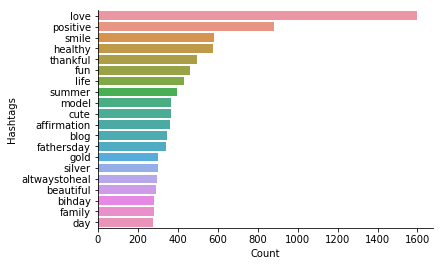

In [32]:
df_positive_plot = df_positive.nlargest(20,columns='Count')data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAbsAAAEKCAYAAACL//vOAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDMuMC4wLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvqOYd8AAAIABJREFUeJzt3XncVVW9x/HPN1BRURBxnlByCAdAwOsEqXlNzTSUQrMSM71q5XCvlmaZZmkONzMrFanU9KqFY2hCKSiSAyijYuKAmfPIIA6Iv/vHXgcOh2c4z7DPOZzn+369ntezz9pr7/07W8+zWPus9VuKCMzMzOrZp6odgJmZWd7c2JmZWd1zY2dmZnXPjZ2ZmdU9N3ZmZlb33NiZmVndc2NnZmZ1z42dmZnVPTd2ZmZW9zpXOwDL7L///nHPPfdUOwwzs5WNyqnkxq5GvDr7ad644vpqh2FmVlHrnfC1ilzHjzGbIGlhtWMwM7O2c2NnZmZ1z41dGZS5WNIsSTMlDU/lN0s6sKjeNZIOk9Qp1Z8saYak/6pe9GZm5sauPIcC/YC+wL7AxZI2Am4CCg3fqsDngLuBY4B5ETEIGAQcK2nLagRuZmZu7Mq1J3BjRCyJiNeA+8kasb8C+0haDTgAeCAi3gf2A74haRrwCLAusHXpSSUdJ2mKpClvLZxfqfdiZtbheDRmeRoc2hoRH0iaAHyerId3Y1H970bE2KZOGhEjgZEA/bbYyqvompnlxD278jwADE/fxa0HDAEeTftuAo4GBgOFxm0scIKkVQAkbSNpzQrHbGZmiXt25bkN2A2YDgTwvYh4Ne0bB1wH3BkRH6WyUUAv4HFJAt4AvlTRiM3MbClF+OlZLRg4cGBMmTKl2mGYma1sysqg4seYZmZW9/wYs0YsfuMVXr3ip9UOw6xVNjzhh9UOwaxJ7tk1QtLxkr6RtkdI2rho3yhJfaoXnZmZtYR7do2IiCuLXo4AZgEvp33fqkZMZmbWOnXZs5PUS9JTkq5N6bpGS1pD0uckTU0pv36fJoMj6eeSnkx1L0ll50g6TdIwYCBwg6RpklaXNEHSQEknSLqo6LojJF2etr8m6dF0zFWSOlXjXpiZWZ02dsm2wMiI2AmYD/w3cA0wPCJ2JOvVniCpBzAU2D7VXe6Ls4gYDUwBjoyIfilDSsFoslRiBcOBmyV9Jm3vERH9gCXAkTm8RzMzK0M9N3YvRsSktH09Wd7K5yPi6VR2Ldnk8PnAB8AoSYcCi8q9QES8ATwnaVdJ65I1sJPStQYAk1PKsM8BW5Uev3y6sPda9SbNzKx59fydXVkTCCPiY0m7kDVIhwPfAfZpwXVuBr4CPAXcFhGRJpJfGxFnNnPtpenC+m6xiSc8mpnlpJ57dptL2i1tHwH8Hegl6dOp7OvA/ZK6At0i4m7gFLLVDUotANZq5Dq3kmVHOYKs4QO4FxgmaX0AST0kbdHWN2RmZq1Tzz272cBRkq4C5gAnAw8Df5bUGZgMXAn0AO6Q1IVsJv6pDZzrGuBKSe+TpQ1bKiLekfQk0CciHk1lT0r6ITBO0qeAxcC3gRfa/22amVlz6jJdmKRewJiI2KHKoZTN6cLMzFrF6cLMzMygTnt2K6MdNu8eo7//2WqHYe1ku2/fUe0QzDoK9+zyJmljSaPT9l6SxlQ7JjMzW1E9D1DJXUS8DAyrdhxmZtY09+wASWtKukvSdEmzJA2XNFfS+ZIeShO/d5Y0VtKzko5Px/WSNKuR8/1e0uSUnuyQyr8rMzMrcGOX2R94OSL6phGc96TyFyNiN2Ai2fSDYcCuwE+aOd9ZwH0RMQjYG7hY0pq5RG5mZs1yY5eZCewr6UJJgyNiXiq/s2j/IxGxIKUI+0BS9ybOtx9wRkoVNgHoAmxeWqk4Xdg7Cz9qtzdjZmbL83d2QEQ8LWkAcCBwgaRxadeH6fcnRduF103dOwGHRcQ/m7nu0nRhO2ze3cNizcxy4p4d2ahKYFFEXA9cAuzcxlOOBb6bcmQiqX8bz2dmZm3gxi6zI/Boeux4FiXL/LTCecAqwIw0gOW8Np7PzMzawJPKa4TThZmZtYonlZuZmYEHqNSMBW/OYcLVX6h2GNYO9jr2rmqHYGYl6rZn19iE71acZ4SkX6ftL0nqU7RvgqSBbb2GmZnlq24bu5x8CejTbC0zM6sp9d7YdZJ0taQnJI2TtLqk3pLukfSYpImStgOQ9EVJj6T0Xn+XtEHxiSTtDhxMlg1lmqTeadeXJT0q6WlJg1PdiZL6FR07SdJOFXrPZmZWot4bu62B30TE9sC7wGFkk7i/GxEDgNOA36a6DwK7RkR/4Cbge8Unioh/kGVUOT0i+kXEs2lX54jYBTgF+HEqGwWMAJC0DbBaRMwoDa44g8q8Bc6gYmaWl3ofoPJ8RExL248BvYDdgT+n+d4Aq6XfmwI3S9oIWBV4vsxr3FpyfoA/Az+SdDrwTbK8misozqCyba9ungNiZpaTem/silN8LQE2AN6NiH4N1L0c+EVE3ClpL+CcFl5jCel+RsQiSX8DDgG+AngQi5lZFdX7Y8xS84HnJX0ZQJm+aV834KW0fVQjxy8A1irzWqOAXwGTI+LtVsZrZmbtoKM1dgBHAsdImg48Qdb7gqwn92dJE4E3Gzn2JuD0NIildyN1AIiIx8ga1z+0S9RmZtZqTheWk5RcegKwXUR80lx9pwszM2sVpwurFknfAB4BziqnoTMzs3y5Z1cjevfqFhf+eLdqh2HAsKPvab6SmdWKjtWzk9Rd0olpey9JY9rpvEvThZWUr1c0CX1wE8efI+m09ojFzMxap24aO6A7cGIFr/c54KmI6B8REyt4XTMza6F6aux+DvROC7BeDHSVNFrSU5JuKFo1/GxJkyXNkjSyqHyCpAtLU38Vk/QFSQ+l5M8XAQem1GGrS1pYVG+YpGsq8abNzKx59dTYnQE8myaMnw70J0vh1QfYCtgj1ft1RAyKiB2A1YGDis7RUOovACQNTdc4MCKmAGcDN6fUYe+3JuDidGHzFzpdmJlZXuqpsSv1aET8O42GnMayVF57p+/aZgL7ANsXHdNQ6i+AvYHvA1+IiHfaK8CIGBkRAyNi4NpdV22v05qZWYl6buxKU4V1ltSFLPHzsIjYEbga6NLAMUtTfyXPkWVO2aaJ6xUPa+3SaC0zM6u4emrsyknlVWiE3pTUFRhW5rlfAA4FrpO0fSN1XpP0GUmfAoaWeV4zM6uAukkEHRFvpXXjZgHvA681UOddSVcDM4G5wOQWnP+fko4kSyn2xQaqnAGMAV4EZgFdW/4uzMwsD55UXiOcLszMrFU61qRyMzOzxtTNY8xKkXQScALweEQc2V7nfeOtOVz1x8+31+msGf/19bHVDsHMKsiNXcudCBwQEeWuZG5mZlXmx5gtIOlKsgnqd0qaV5zzMmVk6ZV+Zku6WtITksZJWr16UZuZmRu7FoiI44GXySaZX9pE1a2B30TE9sC7wGEVCM/MzBrhxi4fz0fEtLRdmo1lqeJ0YQsXOF2YmVle3Ni13scsf/8aysQCK2ZjWao4XVjXtZwuzMwsL27sWm8usDOApJ2BLasajZmZNcqNXevdAvRISwqdADxd5XjMzKwRnnrQQhHRq+jlfo1U26Go/iW5BmRmZs1yurAa4XRhZmat4nRhZmZm4J5di0laGBFdJW0M/CoihqXyG8kWgv1DRDQ1B69BG/fuFsddsGs7R2vnfMVpwczqXFk9O39n10oR8TJpPTxJGwK7R8QW1Y3KzMwa4seYrZTSgs1KL8cB60uaJmmwpN6S7pH0mKSJkrarZqxmZh2de3bt42BgTET0A5B0L3B8RMyR9B/Ab4F9qhmgmVlH5saunUnqCuxOtqJ5oXi1RuoeBxwH0K1nl4aqmJlZO3Bj1/4+Bbxb6OU1JSJGAiMhG6CSd2BmZh2Vv7NrZxExH3he0pcBlOlb5bDMzDo0N3b5OBI4RtJ04AngkCrHY2bWoXmeXY1wBhUzs1ZxBhUzMzNwY2dmZh2AH2PWiG6fXid2/19PxWuNvx5yS7VDMLPq8WPMWpFGZPpem5lVSd38AZa0pqS7JE2XNEvScElzJfVM+wdKmpC2z5F0raRxqc6hki6SNDOl+Vol1Zsr6XxJD0maImlnSWMlPSvp+KJrny5psqQZks5NZb0kzZb0W+BxYLOK3xQzMwPqqLED9gdejoi+EbEDcE8z9XsDXyCbFnA9MD4idgTeT+UFL0bEbsBE4Bqy5M+7Aj8BkLQfsDWwC9APGCBpSDp2W+C6iOgfES+0/S2amVlr1FNjNxPYV9KFkgZHxLxm6v81Ihan4zqxrHGcCfQqqndnUfkjEbEgIt4APpDUnWy18v2AqWQ9uO3IGj+AFyLi4cYCkHRc6jFO+Wj+h2W/UTMza5m6SRcWEU9LGgAcCFwgaRzwMcsa9NLkkx+m4z6RtDiWjdT5hOXvy4dF5cUtUqGegAsi4qrik0vqBbzXTMxL04V1+/Q6HilkZpaTuunZpcVUF0XE9cAlwM7AXGBAqnJYTpceC3wzJYBG0iaS1s/pWmZm1gp107MDdgQulvQJsBg4AVgd+J2kHwCP5HHRiBgn6TPAQ2mVg4XA14AleVzPzMxazvPsaoTThZmZtYrn2ZmZmUGZjzElrQm8nwZzbEM24rAwmtHawZx3X+HA235a7TBq2t1Df1jtEMxsJVVuz+4BoIukTYB7gaPJ5px1eMUT19tSx8zM8lNuY6eIWAQcClweEUOBPvmFZWZm1n7Kbuwk7Ua2KOldqWylHcmZUnk9JWlUSi12g6R9JU2SNEfSLpJ6SLo9pQB7WNJO6dh1U5qxqZKuoujLUUlfk/SopGmSrpLUqWpv0szMliq3sTsFOBO4LSKekLQVMD6/sCri08BlwE5k30F+FdgTOA34AXAuMDUidkqvr0vH/Rh4MCL6k2VX2RwgTT8YDuwREf3Iph4cWbF3Y2ZmjSqrdxYR9wP3F71+Djgpr6Aq5PmImAkg6Qng3ogISYV0YVuQJqJHxH2pR9cNGEL2OJeIuEvSO+l8nyObwD45zbdbHXi9qQAkHQccB9BlvW7t++7MzGypckdj/gUonZA3D5gCXBURH7R3YBVQmvqrOC1YZ7JUY6Wi5HcxAddGxJnlBrB8urBNPOHRzCwn5T7GfI4sM8jV6Wc+8BqwTXpdjx4gPYaUtBfwZkTMLyk/AFgn1b8XGFZIFZa+89ui0kGbmdmKyh1k0j8ihhS9/oukByJiSHoEWI/OAf4gaQawCDgqlZ8L3CjpcbJHu/8CiIgnJf0QGJcWal0MfBvw0j5mZlVWVrowSbOBz0fEv9LrzYF7IqKPpKlpsIa1gdOFmZm1Slnpwsrt2f0P8KCkZ9OJtwROTJlVrm1dfGZmZpVRdiJoSauRDdEX8NRKOiilZnX79Bax50VnVDuMmnbXoSdUOwQzqz3t2rODbPXtbckWQd1JEhFxXTPH1L20SOvuEfF/VQ7FzMwaUdZoTEk/Bi5PP3sDFwEH5xjXyqQX2YR0MzOrUeVOPRhGNmn61Yg4GugLrJZbVDVA0jdSqrDpkv4o6RpJw4r2L0ybPwcGpxRhp0rqJOliSZPT8f9VnXdgZmYF5T7GLCzv87Gktckyg2yVY1xVJWl74Cyy1F9vSuoB/KKR6mcAp0XEQenY44B5ETEofc85SdK4iHi+IsGbmdkKym3spkjqTjaB/DGyCeaP5hZV9e0DjI6INwEi4u2UAqwc+5F9p1noBXYj+75zhcZuuXRhPXu0NWYzM2tEubkxT0ybV0q6B1g7ImbkF1bViRVTgn1MeuyrrOVbtYljvxsRY5u7yPLpwrZwujAzs5yUO0Dl3sJ2RMyNiBnFZXXoXuArktaFLPUXMJcs0TPAIcAqaXsBsFbRsWOBEyStko7dJs1HNDOzKmmyZyepC7AG0FPSOiybz7A2sHHOsVVNWsboZ8D9kpYAU4HvA3dIepSsMXwvVZ8BfCxpOtnq7ZeRjdB8PPUA3wC+VNl3YGZmxZqcVC7pZLK17DYGXmJZYzcfuDoifp17hB2E04WZmbVK2yeVR8RlwGWSvhsRl7dLWGZmZhXWknRhu5M9nlvaQDqDSvvp3nur2PPC86odRs0aM8yLvptZg8rq2ZU7QOWPwCXAnsCg9DOw1aG1gqQvS5otaXx6fWOatH2qpJ9I2jen6/6g5PU/8riOmZnlp9x5dgOBPlFuNzAfxwAnRsR4SRuS5aNscnFUSZ0iYkkbr/sD4PzCi4jYvY3nMzOzCis3XdgsYMM8Aykm6XZJj0l6QtJxks4m61VeKeliYBywfkrRNbg4lZekuZLOlvQg8GVJEyRdKumB1DMcJOlWSXMk/bSxa6aynwOrp+vckMoWpt9KacFmSZopaXgq3ytdc7SkpyTdoBbMSDczs/bX3NSDv5BNrl4LeDINu/+wsD8i8koG/c2UtWR1YDLwWbKsJqdFxBRJvwHGRES/FOcxJcd/EBF7pn3HAx+lVdVPBu4gmy/3NvCspEsj4q3Sa0q6JSLOkPSdwnVKHAr0I8sT2jMd80Da1x/YHngZmATsATzYPrfGzMxaqrnHmJdUJIoVnSRpaNrejCzdVkvcXPL6zvR7JvBERLwCIOm5dP63GrnmW01cY0/gxvSY9DVJ95N9lzkfeDQi/p2uMY1sYM8KjV1xurDVe67bwrdoZmblam7qwf0AKQNIIRn0NmSLuP41j4Ak7QXsC+wWEYskTSBbQ68l3it5XeiNflK0XXjduZXXbOrRZPE1ltDIfS5OF9a991ZOF2ZmlpNyv7N7AOgiaROy7CFHk2ULyUM34J3U6GwH7JrTdcq95uJC6q8SDwDD05I+6wFDqO/k2GZmK61yGztFxCKy76kuj4ihZN9J5eEest7WDOA84OGcrlPuNUcCMwoDVIrcRpYqbDpwH/C9iHi1ArGamVkLlTWpXNJU4ETgUuCYlDtyZkTsmHeAHYXThZmZtUr7TSoHTgbOBG5LDd1WwPjWRmZmZlZJZacLs3x17711DLmwscXQO6Y7h32x2iGYWe1r13Rh66UJ1HdLuq/w07b4apukXpJmNVA+QVJFU6WZmVnblPsY8wbgKWBL4FyyhUwn5xSTmZlZuyq3sVs3In4HLI6I+yPim1RmSkC1dZZ0bUo4PVrSGsU7JR2RUoXNknRhUfkxkp5OvcCrJXndPzOzKiq3sVucfr8i6QuS+gOb5hRTLdkWGBkRO5FlRjmxsEPSxsCFZGnM+gGDJH0plf+I7B8D/0k2Ab9BKe/nFElTPpo/L8e3YWbWsZW76sFPJXUD/ge4HFgbODW3qGrHixExKW1fD5xUtG8QMCEi3gBI8/CGpH33R8TbqfzPwDYNnXz5DCpbe6SQmVlOymrsImJM2pwH7J1fODWntAEqft3YCCCvcGBmVmOaW/Xgclb8g79URJzU2L46sbmk3SLiIeAIsmTOhfHwjwCXSeoJvJP2Xw5MAS6VtA6wADiMLAG1mZlVSXM9u+KUHucCP84xllo0GzhK0lXAHOAKUmMXEa9IOpNscr2AuyPiDgBJ55M1hi8DT5L1iM3MrErKnlQuaWpE9M85nrogqWtELJTUmSyH5u8j4ramjnG6MDOzVmnXdGHQxONMW8E5aR27WcDzwO1VjsfMrEMrdzSmtUBEnNbSY559ZyFDb/Fi5gW3HbZntUMwszrSZM9O0gJJ8yXNB3YqbBfK8wxM0kmSZjewtE5hfz9JBxa9PkdSixuZVsS1MO9rmJlZ+2pupfK1KhVIA04EDoiI5xvZ3w8YCNzdHheT1CkilrTHuczMrLa05Du7ipF0JbAVcKek70v6h6Sp6fe2klYFfkK2Uvg0ScPToX1Siq7nJJ1UdL6vSXo01b1KUqdUvlDSTyQ9Auwm6eeSnkzpwS5JdbaU9JCkyZLOKzpnV0n3Sno8pQw7JJWfJ+nkono/K47FzMwqryYbu4g4nmzY/t5kw/2HpJGgZwPnR8RHafvmiOgXETenQ7cDPg/sAvxY0iqSPgMMB/aIiH7AEuDIVH9NYFZE/AfZFIGhwPYpPdhPU53LgCsiYhBQvBL5B8DQiNg5xfm/kgT8DjgKQNKngMPJEmmvoDhd2Ifz3231/TIzs6atDANUugHXStqabEToKk3UvSsiPgQ+lPQ6sAHwOWAAMDlri1gdeD3VXwLckrbnkzVgoyTdBRSyxuxBNjEc4I9k+TAhG+56vqQhwCfAJsAGETFX0lspf+gGwNSIeKuhYIvTha3TezuPdjUzy8nK0NidB4yPiKGSegETmqj7YdH2ErL3J+DaiDizgfofFL6ni4iPJe1C1jgeDnyHLMkzNDzt4khgPWBARCyWNBfokvaNAkYAGwK/b/rtmZlZ3mryMWaJbsBLaXtEUfkCoJwBNPcCwyStDyCph6QtSitJ6gp0i4i7gVPIBsAATCJr/GDZ489CXK+nhm5voPictwH7kyWLHltGjGZmlqOVobG7CLhA0iSgU1H5eLIBKcUDVFYQEU8CPwTGSZoB/A3YqIGqawFjUp37Wbaqw8nAtyVNJmvgCm4ABkqaQtYIPlV0zY9SfH/yCE8zs+orO12YlS8NTHkc+HJEzCnnGKcLMzNrlXZPF2ZlkNQHeAa4t9yGzszM8rUyDFBZKUi6BhgTEaPJ5ggWyvcCTouIg5o6/rl3P2T4rc/kGmMtufnQT1c7BDPrQNyzMzOzuueeXRMk/Yhs8MmLwJvAY8DfgSuBNYBngW9GxDslx+0P/DId83glYzYzsxW5Z9cISQPJJpP3Bw4ly8MJcB3w/ZRlZSYlC9pK6gJcTbbI62CyuXZmZlZFbuwatydwR0S8HxELgL+QpRfrHhH3pzrXAkNKjtsOeD4i5kQ21PX6xi6wXLqweW/n8BbMzAzc2DWlrOGsjShrPkdEjIyIgRExcLVuPdpwOTMza4obu8Y9CHxRUpeUXeULwHvAO5IGpzpfJ5uAXuwpYEtJvdPrIyoSrZmZNcoDVBoREZMl3QlMB14ApgDzyFY0uFLSGsBzwNElx30g6TjgLklvkjWaO1Q0eDMzW44zqDRBUteIWJgatgeA4yIil9GVzqBiZtYqZX3l5J5d00amjChdyFZO8DQCM7OVkBu7JkTEV6sdg5mZtZ0buwZIGgX8IiKeTOvUDYyIN/O85uvvLuY3t72W5yVqyreHblDtEMysA3Fj14CI+FZ7nk/ZEumKiE/a87xmZlaeDj/1QNKaku6SNF3SLEnDJU1IGVSK610o6cSi1+dI+p+0fbqkyZJmSDo3lfWSNFvSb8lShm1WyfdlZmbLdPjGjmxF8Zcjom9E7ADc00i9m4DiRWK/AvxZ0n7A1sAuZKubD5BUyKqyLXBdRPSPiBfyCd/MzJrjxi7Lb7lv6rkNjoh5DVWKiKnA+pI2ltQXeCci/gXsl36mkvXgtiNr/ABeiIiHG7twcbqwhfOdLszMLC8d/ju7iHha0gDgQOACSeOaqD4aGEaW3PmmVCbggoi4qriipF5kGVeauvZIYCTA5p/u6wmPZmY56fCNnaSNgbcj4npJC4ERTVS/iWxFg57AZ1PZWOA8STekCeibAIvzjNnMzFqmwzd2wI7AxZI+IWukTgAuaahiRDwhaS3gpYh4JZWNk/QZ4KFs0CULga8BSyoRvJmZNc/pwmqE04WZmbVKWenCPEDFzMzqnhs7MzOrexX/zq6Qfgv4GPhqRPy2wtc/BRgZEYuaqbcwIrq2w/X2Ak6LiIOaqjfvnY/56825ZiSrGQcM71ntEMysg6lmz647cGKztdrfKcAaVbiumZlVSa6NnaTbJT0m6Ym0oGmxnwO9JU2TdLGk30o6OB13m6Tfp+1jJP20sfOl/ZcWXfNYSb9oJA3YScDGwHhJ41P9IyTNTHUuLIn/Z+n4hyVtkMrWk3RLSg82WdIeqXwXSf+QNDX93jaPe2pmZi2Xd8/umxExgOyx5UmS1i3adwbwbET0i4jTyRZHHZz2bQL0Sdt7AhObON9NwMGSVkl1jgb+QANpwCLiV8DLwN4RsXeaY3chsA9Zqq9Bkr6UzrMm8HBE9E2xHZvKLwMujYhBwGHAqFT+FDAkIvoDZwPnt/ammZlZ+8r7O7uTJA1N25uxLI1WQyYCp6TFUp8E1pG0EbAbcFJj54uIhyXdBxwkaTawSkTMlPQhcEnqrY2JiImsaBAwISLeAJB0AzAEuB34CBiT6j0G/Gfa3hfok+bUAayd5t51A66VtDUQQKHxbVTqnR4HsH7PTZurbmZmrZRbY5cGZuwL7BYRiyRNIFvxu0ER8ZKkdch6ZA8APciSLS+MiAXNnG8U8AOy3tUf0vlWSAMWET8pDbOJt7A4lk1CXMKye/WpFMP7Je/3cmB8RAxNqcImNHHuwntemi5s6979POHRzCwneT7G7EaWLHmRpO2AXUv2LwDWKil7iGwAyQNkPb3TWPYIs9HzRcQjZD29rwI3wtI0YIsi4nqyjCg7N3DdR4DPSuopqRNwBHB/M+9rHPCdwgtJ/Yrieyltj2jmHGZmVkF5Nnb3AJ0lzQDOA5bL/h8RbwGT0sCQi1PxRKBzRDxDtoJAD5Y1dk2eD/gTMCki3kmvdwQelTQNOAv4aSofCfxV0viU8utMYDwwHXg8Iu5o5n2dBAxMa9c9CRyfyi8i60FOAjo1cw4zM6ugukkXJmkM2cCRe6sdS2s4XZiZWat0jHRhkrpLehp4f2Vt6MzMLF8r/aoHEfEusE2142irRW9+zNRRr1c7jNz1/9b61Q7BzDqglbpnJ6mXpFk5n/+rRa8HSvpV2l5N0t/TpPjhTZxjhKRf5xWjmZk1b6Xv2eWsF9kIz/8DiIgpQOGLtf5kc/r6NXyomZnVipW6Z5d0lnRtGh05WtIakgZIuj+lFhubJqcXUolNTinAbpG0Riq/RtKwwgmVrVgOWUqzwan3dqqkvSSNkbQ+cD3QL+3rLWmupJ7p+IFpHqCZmdWAemjstiVbxWAnYD7wbeByYFhKLfZ74Gep7q0RMSilAJsNHNPMuc8AJqaUZkvzb0bE68C3ivY9275vyczM2lM9PMZ8MSImpe3ryTKp7AD8LaX06gS8kvbvkJJKdwe6AmMrHOtyitOFbdjD6cLMzPJSD41d6UTBBcCPT8ZzAAAMjUlEQVQTEbFbA3WvAb4UEdMljQD2SuUfk3q5ylrIVVsRx9Jz0ERatGLF6cL69HK6MDOzvNTDY8zNJRUatiPIMqusVyiTtIqk7dP+tYBX0goJRxadYy4wIG0fwrIkzg2lNGtM8TkOa+F7MDOzHNVDYzcbOCqlEetB+r4OuFDSdGAasHuq+yOyfJh/I0saXXA1WY7MR4H/AN5L5TOAj9OAllObieNc4DJJE8kSR5uZWY2om3RhKzunCzMza5WOkS7MzMysOfUwQKUuLH51Ma9c9FLzFVdSG31vk2qHYGYdWIfp2TWWWkzSqLQ6evFk8ubOVVY9MzOrDR2+ZxcR36p2DGZmlq8O07NLGkotNkHSwEIFST9Loy8flrRBKttS0kMp1dh5RXW7SrpX0uOSZko6JJWfJ+nkknOeVMk3amZmy3S0xq40tdiJJfvXBB5O6cQeAI5N5ZcBV0TEIODVovofAEMjYmdgb+B/06T03wFHAUj6FHA4cEM+b8nMzJrT0Rq70tRie5bs/wgYk7YfI1v1AGAP4Ma0/cei+gLOT3P8/g5sAmwQEXOBtyT1B/YDpkbEW6XBSDpO0hRJU956b4XdZmbWTjrad3alkwpLXy+OZRMPl7D8/WloQuKRwHrAgIhYLGkuy1KFjQJGABuSJaNeMZiidGF9N+3rCY9mZjnpaD270tRiD5Z53CSyR5GwfJqxbsDrqaHbG9iiaN9twP7AIKqccNrMrKPraI1daWqxK8o87mTg25ImkzVwBTcAAyVNIWsEl6Ygi4iPgPHAnyLC6cPMzKrI6cJykgamPA58OSLmNFff6cLMzFrF6cKqJU1Sfwa4t5yGzszM8tXRBqhUREQ8CWzVkmMWv7aI1375WE4RVd8GpwxovpKZWU46ZM9O0kmSZktq09w3ST+RtG/aXm5yupmZ1Y6O2rM7ETggIp5vy0ki4ux2isfMzHLU4Xp2kq4ke8R4p6TvS/qHpKnp97apzghJt0v6i6TnJX1H0n+neg9L6pHqXSNpWMn5j5F0adHrYyX9opLv0czMltfhGruIOB54mSy91xXAkIjoD5wNnF9UdQfgq8AuwM+ARaneQ8A3mrjETcDBklZJr48G/tBQxeIMKm+/904b3pWZmTWloz7GLOgGXCtpa7IMKasU7RsfEQuABZLmAX9J5TOBnRo7YUS8J+k+4CBJs4FVImJmI3WXZVDZrI/ngJiZ5aTD9exKnEfWqO0AfJFlqb4APiza/qTo9Sc0/4+EQqqwRnt1ZmZWOe7ZQWF58BHtddKIeETSZsDONNELNDOzyujoPbuLgAskTQI6tfO5/wRMigh/GWdmVmVOF5YTSWOASyPi3nLqO12YmVmrOF1YNUjqLulp4P1yGzozM8tXR//Ort1FxLvANi097uPX5/P6r8flEFH1rf+d/aodgpl1cO7ZtYKkcySdVu04zMysPG7szMys7rmxK5OksyT9U9LfgUJasWMlTZY0XdItktaQtFZKMbZKqrO2pLlFGVXMzKzC3NiVQdIA4HCgP3AoMCjtujUiBkVEX7JV0I9JWVcmAF9IdQ4HbomIxQ2cd2m6sLcWzsv7bZiZdVhu7MozGLgtIhZFxHzgzlS+g6SJkmYCRwLbp/JRZNlToIksKhExMiIGRsTAdbt2yzF8M7OOzY1d+RqakHgN8J2I2BE4l5RuLCImAb0kfRboFBGzKhalmZmtwI1deR4AhkpaXdJaZHk0AdYCXknfxx1Zcsx1wI04N6aZWdW5sStDRDwO3AxMA24BJqZdPwIeAf4GPFVy2A3AOmQNnpmZVZHTheUkLep6SER8vZz6ThdmZtYqZaULc2OXA0mXAwcAB0bE02UeswD4Z66BtU1P4M1qB9EEx9c2jq9tHF/rtTW2NyNi/+YqubGrEZKmRMTAasfRGMfXNo6vbRxf29RyfJWKzd/ZmZlZ3XNjZ2Zmdc+NXe0YWe0AmuH42sbxtY3ja5tajq8isfk7OzMzq3vu2ZmZWd1zY1dlkvZPqyk8I+mMKsWwmaTxkmZLekLSyam8h6S/SZqTfq+TyiXpVynmGZJ2rlCcnSRNlTQmvd5S0iMpvpslrZrKV0uvn0n7e1Ugtu6SRkt6Kt3H3Wrp/kk6Nf23nSXpRkldqnn/JP1e0uuSZhWVtfh+SToq1Z8j6aic47s4/fedIek2Sd2L9p2Z4vunpM8Xlefy+W4ovqJ9p0kKST3T65q4f6n8u+l+PCHpoqLy/O9fRPinSj9AJ+BZYCtgVWA60KcKcWwE7Jy21wKeBvoAFwFnpPIzgAvT9oHAX8kmc+4KPFKhOP8b+D9gTHr9J+DwtH0lcELaPhG4Mm0fDtxcgdiuBb6VtlcFutfK/QM2AZ4HVi+6byOqef+AIcDOwKyishbdL6AH8Fz6vU7aXifH+PYDOqftC4vi65M+u6sBW6bPdKc8P98NxZfKNwPGAi8APWvs/u0N/B1YLb1ev5L3L7cPmH/K+h9iN2Bs0eszgTNrIK47gP8km+S+USrbCPhn2r4KOKKo/tJ6Oca0KXAvsA8wJn1w3yz647P0XqYP+25pu3OqpxxjW5usMVFJeU3cP7LG7sX0R61zun+fr/b9A3qV/DFs0f0CjgCuKipfrl57x1eybyhwQ9pe7nNbuH95f74big8YDfQF5rKssauJ+0f2j6t9G6hXkfvnx5jVVfgjVPDvVFY16ZFVf7KcnxtExCsA6ff6qVo14v4l8D3gk/R6XeDdiPi4gRiWxpf2z0v187IV8Abwh/SYdZSkNamR+xcRLwGXAP8CXiG7H49RO/evoKX3q5qfn2+S9ZZoIo6KxifpYOCliJhesqsm4gO2AQanR+P3SyqsC1qR+NzYVVdDOd2qNjxWUleyRNenRLZuX6NVGyjLLW5JBwGvR8RjZcZQ6fvameyRzRUR0R94j+wxXGMqff/WAQ4he0S0MbAmWTq7xmKoqf8vaTyeqsQp6SzgY7Jk7zQRR8Xik7QGcBZwdkO7G4mjGp+TdcgepZ4O/EmSmoijXeNzY1dd/yZ7xl6wKfByNQJRtkzRLWSPZm5Nxa9J2ijt3wh4PZVXOu49gIMlzQVuInuU+Uugu6TODcSwNL60vxvwdo7x/Rv4d0Q8kl6PJmv8auX+7Qs8HxFvRMRi4FZgd2rn/hW09H5V/POTBnEcBBwZ6dlajcTXm+wfM9PT52RT4HFJG9ZIfKTr3RqZR8me0vSsVHxu7KprMrB1GhW3KtlggDubOabdpX9d/Q6YHRG/KNp1J1AYoXUU2Xd5hfJvpFFeuwLzCo+f8hARZ0bEphHRi+we3RcRRwLjgWGNxFeIe1iqn9u/WCPiVeBFSdumos8BT1Ij94/s8eWuktZI/60L8dXE/SvS0vs1FthP0jqp97pfKsuFpP2B7wMHR8SikrgPVzaKdUtga+BRKvj5joiZEbF+RPRKn5N/kw06e5UauX/A7WT/UEXSNmSDTt6kUvevvb6M9E+rv8Q9kGz047PAWVWKYU+yxwMzyNbsm5biWpdsUMic9LtHqi/gNynmmcDACsa6F8tGY26VPhTPAH9m2SivLun1M2n/VhWIqx8wJd3D28ke19TM/QPOJVtzcRbwR7KRb1W7f2TrPL4CLCb7w3xMa+4X2Xdnz6Sfo3OO7xmy75AKn5Eri+qfleL7J3BAUXkun++G4ivZP5dlA1Rq5f6tClyf/h98HNinkvfPGVTMzKzu+TGmmZnVPTd2ZmZW99zYmZlZ3XNjZ2Zmdc+NnZmZ1T03dmYdiKQNJd0k6VlJT0q6O815aq/z7yVp9/Y6n1l7cWNn1kGkCeW3ARMiondE9AF+AGzQjpfZiyw7i1lNcWNn1nHsDSyOiCsLBRExDXhQ2VptsyTNlDQclvbSxhTqSvq1pBFpe66kcyU9no7ZLiURPx44VdI0SYMr+N7MmtS5+SpmVid2IFvtoNShZBlg+pLlKpws6YEyzvdmROws6UTgtIj4lqQrgYURcUm7RW3WDtyzM7M9gRsjYklEvAbcDwxq5hjIEkpD1oD2yik2s3bhxs6s43gCGNBAeUNLqUC2jE3x34guJfs/TL+X4KdEVuPc2Jl1HPcBq0k6tlCQFtB8BxguqZOk9YAhZAmgXwD6pGz03chWS2jOAmCt9g/drG38rzGzDiIiQtJQ4JeSzgA+IMuOfwrQFZhOtvrF9yJbGgZJfyJbyWEOMLWMy/wFGC3pEOC7ETGx3d+IWSt41QMzM6t7foxpZmZ1z42dmZnVPTd2ZmZW99zYmZlZ3XNjZ2Zmdc+NnZmZ1T03dmZmVvfc2JmZWd37f8hiyIbgj8uRAAAAAElFTkSuQmCC

sns.barplot(data=df_positive_plot,y='Hashtags',x='Count')
sns.despine()


In [33]:

word_freq_negative = nltk.FreqDist(ht_negative_unnest)

word_freq_negative

FreqDist({'trump': 136, 'politics': 95, 'allahsoil': 92, 'libtard': 76, 'liberal': 75, 'sjw': 74, 'retweet': 63, 'miami': 46, 'black': 44, 'hate': 33, ...})

In [34]:
df_negative = pd.DataFrame({'Hashtags':list(word_freq_negative.keys()),'Count':list(word_freq_negative.values())})

df_negative.head(10)

,Hashtags,Count
0,cnn,10
1,michigan,2
2,tcot,14
3,australia,6
4,opkillingbay,5
5,seashepherd,22
6,helpcovedolphins,3
7,thecove,4
8,neverump,8
9,xenophobia,12


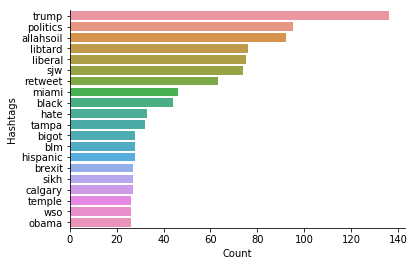

In [35]:

df_negative_plot = df_negative.nlargest(20,columns='Count') 

sns.barplot(data=df_negative_plot,y='Hashtags',x='Count')
sns.despine()

In [36]:
#Making a Count matrix 
from sklearn.feature_extraction.text import CountVectorizer

bow_vec = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')

# bag-of-words feature matrix
bow = bow_vec.fit_transform(combine['Tidy_Tweets'])

df_bow = pd.DataFrame(bow.todense())

df_bow

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
# tf-idf matrix
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer(max_df=0.90, min_df=2,max_features=1000,stop_words='english')

tfidf_matrix=tfidf.fit_transform(combine['Tidy_Tweets'])

df_tfidf = pd.DataFrame(tfidf_matrix.todense())

df_tfidf

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.554306,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
train_bow = bow[:31962]

train_bow.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [40]:
train_tfidf_matrix = tfidf_matrix[:31962]

train_tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [42]:
from sklearn.model_selection import train_test_split
# bag-of-word split
x_train_bow, x_valid_bow, y_train_bow, y_valid_bow = train_test_split(train_bow,train['label'],test_size=0.2,random_state=2) 
# tf-idf matrix
x_train_tfidf, x_valid_tfidf, y_train_tfidf, y_valid_tfidf = train_test_split(train_tfidf_matrix,train['label'],test_size=0.3,random_state=17)

In [51]:
# Applying ML Algorithm

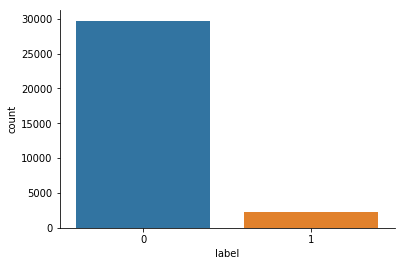

In [52]:
#Should we use Accuracy as our measure?
sns.countplot(train_original['label'])
sns.despine()

In [53]:
#Since this is a class imbalance problem. Hence we shall use F-Score as our measure and not Accuracy

In [44]:
from sklearn.metrics import f1_score

In [45]:
#Applying 2 ML models: Logistic Regression and XGBoost

In [58]:
#Logistic Regression:
from sklearn.linear_model import LogisticRegression
Log_Reg = LogisticRegression(random_state=0,solver='lbfgs')

#For bag-of-words:
Log_Reg.fit(x_train_bow,y_train_bow)
prediction_bow = Log_Reg.predict_proba(x_valid_bow)

# For tf-idf
Log_Reg.fit(x_train_tfidf,y_train_tfidf)
prediction_tfidf = Log_Reg.predict_proba(x_valid_tfidf)

# if prediction is greater than or equal to 0.3 than 1 else 0
# Where 0 is for positive sentiment tweets and 1 for negative sentiment tweets
prediction_int1 = prediction_bow[:,1]>=0.3
prediction_int2 = prediction_tfidf[:,1]>=0.3

prediction_int1 = prediction_int1.astype(np.int)
prediction_int2 = prediction_int2.astype(np.int)

# calculating f1 score
log_bow = f1_score(y_valid_bow, prediction_int1)
log_tfidf = f1_score(y_valid_tfidf, prediction_int2)

print(f"Logistic Regression F-Scores for Bag-of-Words: {log_bow} and for tf-idf it is {log_tfidf}")

Logistic Regression F-Scores for Bag-of-Words: 0.5535055350553505 and for tf-idf it is 0.5610619469026549


In [60]:
#Applying XGBoost
from xgboost import XGBClassifier

# Bag-of Word
model_bow = XGBClassifier(random_state=22,learning_rate=0.9)
model_bow.fit(x_train_bow, y_train_bow)
xgb = model_bow.predict_proba(x_valid_bow)

# For tf-idf
model_tfidf = XGBClassifier(random_state=29,learning_rate=0.7)
model_tfidf.fit(x_train_tfidf, y_train_tfidf)
xgb_tfidf=model_tfidf.predict_proba(x_valid_tfidf)


# if prediction is greater than or equal to 0.3 than 1 else 0
# Where 0 is for positive sentiment tweets and 1 for negative sentiment tweets
xgb=xgb[:,1]>=0.3
xgb_tfidf=xgb_tfidf[:,1]>=0.3

# converting the results to integer type
xgb_int=xgb.astype(np.int)
xgb_int_tfidf=xgb_tfidf.astype(np.int)

# calculating f1 score
xgb_bow=f1_score(y_valid_bow,xgb_int)
score=f1_score(y_valid_tfidf,xgb_int_tfidf)

print(f"XGB Scores for Bag-of-Words: {xgb_bow} and for tf-idf it is {score}")

ModuleNotFoundError: No module named 'xgboost'

In [61]:
lgo_1 = ['LogisticRegression(Bag-of-Words)','XGBoost(Bag-of-Words)']

score_1 = [log_bow,xgb_bow]

compare_1 = pd.DataFrame({'Model':Algo_1,'F1_Score':score_1},index=[i for i in range(1,4)])

score_2 = [log_tfidf,score,dct_score_tfidf]

compare_2 = pd.DataFrame({'Model':Algo_2,'F1_Score':score_2},index=[i for i in range(1,4)])

print(compare_1.T)
print(compare_2.T)

NameError: name 'xgb_bow' is not defined

In [62]:
#Making predictions:
test_tfidf = tfidf_matrix[31962:]
test_pred = Log_Reg.predict_proba(test_tfidf)

test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)

test['label'] = test_pred_int

submission = test[['id','label']]
submission

,id,label
0,31963,0
1,31964,1
2,31965,0
3,31966,0
4,31967,0
5,31968,0
6,31969,0
7,31970,0
8,31971,0
9,31972,0
